# Welcome
Hi! I'm **schneisse** from https://github.com/schneisse and this is AstroSpace project tutorial. I hope it will help you to understand what's going on here by the reference examples.
If you have any questions/ideas/critics, do not hesitate to write me an email: anyak2802@gmail.com 

Enjoy the code!

# Quick intro
<!-- # Why are we here?  -->


*coming soon*

# Imports

In [96]:
import numpy as np
from numpy import linalg
import os
import pandas as pd
from importlib import reload
import sys
from pathlib import Path
import itertools as itt
import scipy as sp
from scipy import ndimage as ndi
from scipy import stats
import networkx as nx 
from tqdm.auto import tqdm

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.lines import Line2D
import cmasher as cmr

from matplotlib.pyplot import figure, gcf, gca, plot, close, xlim, ylim, xlabel, ylabel, title,\
                              subplots
from cycler import cycler
# plt.style.use('seaborn-dark')

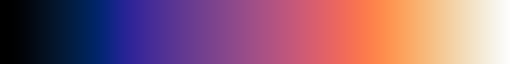

In [2]:
# set style
sequential_map = 'cmr.torch'
gradient_map = 'BuPu'
diverging_map = 'cmr.viola'
cyclic_map = 'twilight_shifted'

plt.rcParams['image.cmap'] = sequential_map
plt.get_cmap(sequential_map)

In [97]:
# import Space Colonization Scripts
import SCA
from SCA import Space_colonization
from point_cloud import PointCloud
import utils
from utils import Sholl, SWC_analyse

# Let's have a closer look at the algorithm components

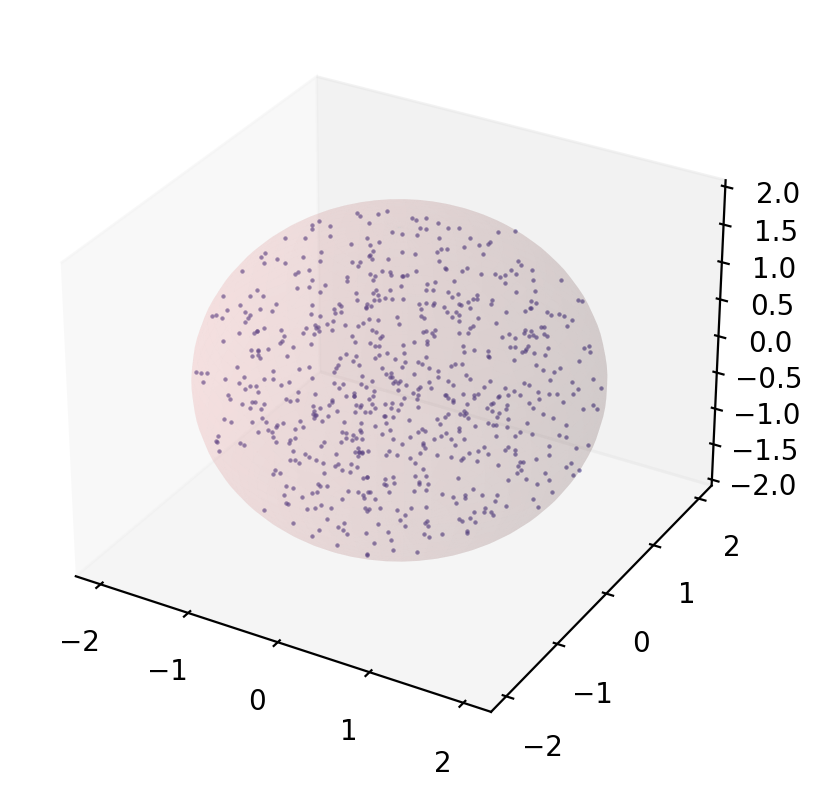

In [399]:
# create a point cloud distributed at the sphere surface
Cloud = PointCloud(Npoints=700)
sources_1 = Cloud.Sphere()
sources_2 = Cloud.Cube()
sources_3 = Cloud.Sphere_surface()
sources = sources_1
R = Cloud.radius

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(sources[:, 0], sources[:, 1], sources[:, 2], 'o', color='darkslateblue', alpha=0.6, ms=0.6)

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)

ax.plot_surface(x, y, z, color="lightcoral", alpha=0.1)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.grid(False)

In [400]:
Cloud.__dict__

{'cloud': array([[ 1.54751549,  1.06089065, -0.69260872],
        [-1.07476667, -1.68493167,  0.07669345],
        [ 1.73493368, -0.94524435,  0.31067385],
        ...,
        [-1.35363376, -0.91872042,  1.15049051],
        [ 1.25824246,  1.36807641, -0.73837176],
        [-1.338747  , -1.4858049 , -0.01184394]]),
 'radius': 2,
 'Npoints': 700,
 'center': [0, 0, 0]}

In [401]:
# initialize a tree
# regular case of root (or soma center) placement -- cloud center
# root = np.array(Cloud.center)
root = np.array(np.array([0.1, 1.0, 0]))
root

array([0.1, 1. , 0. ])

In [402]:
# transformed_points = sources.copy()

In [403]:
# roughness = 0.7

# # Add sine waves to create landscape-like features
# transformed_points[:, 2] += -roughness * np.sin(transformed_points[:, 0]) 
# transformed_points[:, 1] += roughness * np.cos(transformed_points[:, 2])

# # transformed_points[:, 1] *= (1 - roughness)

# fig = plt.figure(dpi=200)
# ax = fig.add_subplot(projection='3d')
# ax.plot(transformed_points[:, 0], transformed_points[:, 1], transformed_points[:, 2], 'o', color='darkslateblue', alpha=0.6, ms=0.6)

# u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
# x = R*np.cos(u)*np.sin(v)
# y = R*np.sin(u)*np.sin(v)
# z = R*np.cos(v)

# ax.plot_surface(x, y, z, color="lightcoral", alpha=0.1)
# ax.set_facecolor('white')
# fig.set_facecolor('white')
# ax.grid(False)

In [404]:
init_SCA = Space_colonization(root=root, 
                              sources=sources, 
                              tree=set())
init_SCA.__dict__

{'tree': {<SCA.TreeNode at 0x32a2aa0d0>},
 'root': <SCA.TreeNode at 0x32a2aa0d0>,
 'sources': array([[ 0.81297874,  0.09477628,  0.02347698],
        [ 1.44049039,  0.57741817,  0.30339474],
        [-0.39668622, -0.82943624, -0.02501317],
        ...,
        [-0.05212899, -1.50771635,  0.38602258],
        [-0.111268  , -0.58238523,  0.49797684],
        [ 0.70347301,  0.50563916,  0.23730526]]),
 'iterations': 1000,
 'Di': 1,
 'Dg': 0.02,
 'Dk': 0.04,
 'w_lim': 400}

In [405]:
# anly root nodes always contains None in parent feature
for i in init_SCA.tree:
    print(i.parent)

None


In [406]:
# Di, Dg and Dk parameters sets automatically since
# SCA initiated. Use the following code to customize
# parameters:
init_SCA.set_parameters(
    iters=350,
    Di=0.2,
    Dg=0.08,
    Dk=0.16,
    w_lim=100
)
init_SCA.__dict__

{'tree': {<SCA.TreeNode at 0x32a2aa0d0>},
 'root': <SCA.TreeNode at 0x32a2aa0d0>,
 'sources': array([[ 0.81297874,  0.09477628,  0.02347698],
        [ 1.44049039,  0.57741817,  0.30339474],
        [-0.39668622, -0.82943624, -0.02501317],
        ...,
        [-0.05212899, -1.50771635,  0.38602258],
        [-0.111268  , -0.58238523,  0.49797684],
        [ 0.70347301,  0.50563916,  0.23730526]]),
 'iterations': 350,
 'Di': 0.2,
 'Dg': 0.08,
 'Dk': 0.16,
 'w_lim': 100,
 'upd_cycle': 100}

In [407]:
help(init_SCA.set_parameters)

Help on method set_parameters in module SCA:

set_parameters(iters, Di, Dg, Dk, w_lim=400, upd_cycle=100) method of SCA.Space_colonization instance
    Set growth parameters:
    
    iters: # iterations
    Di: Influence Distance
    Dg: Segment Distance
    Dk: Kill Distance



# Grow a tree!

In [408]:
# initiate tree computation
init_SCA.go_tree_classic()

  0%|          | 0/350 [00:00<?, ?it/s]

In [409]:
# check new tree nodes
init_SCA.tree

{<SCA.TreeNode at 0x347d000d0>,
 ...}

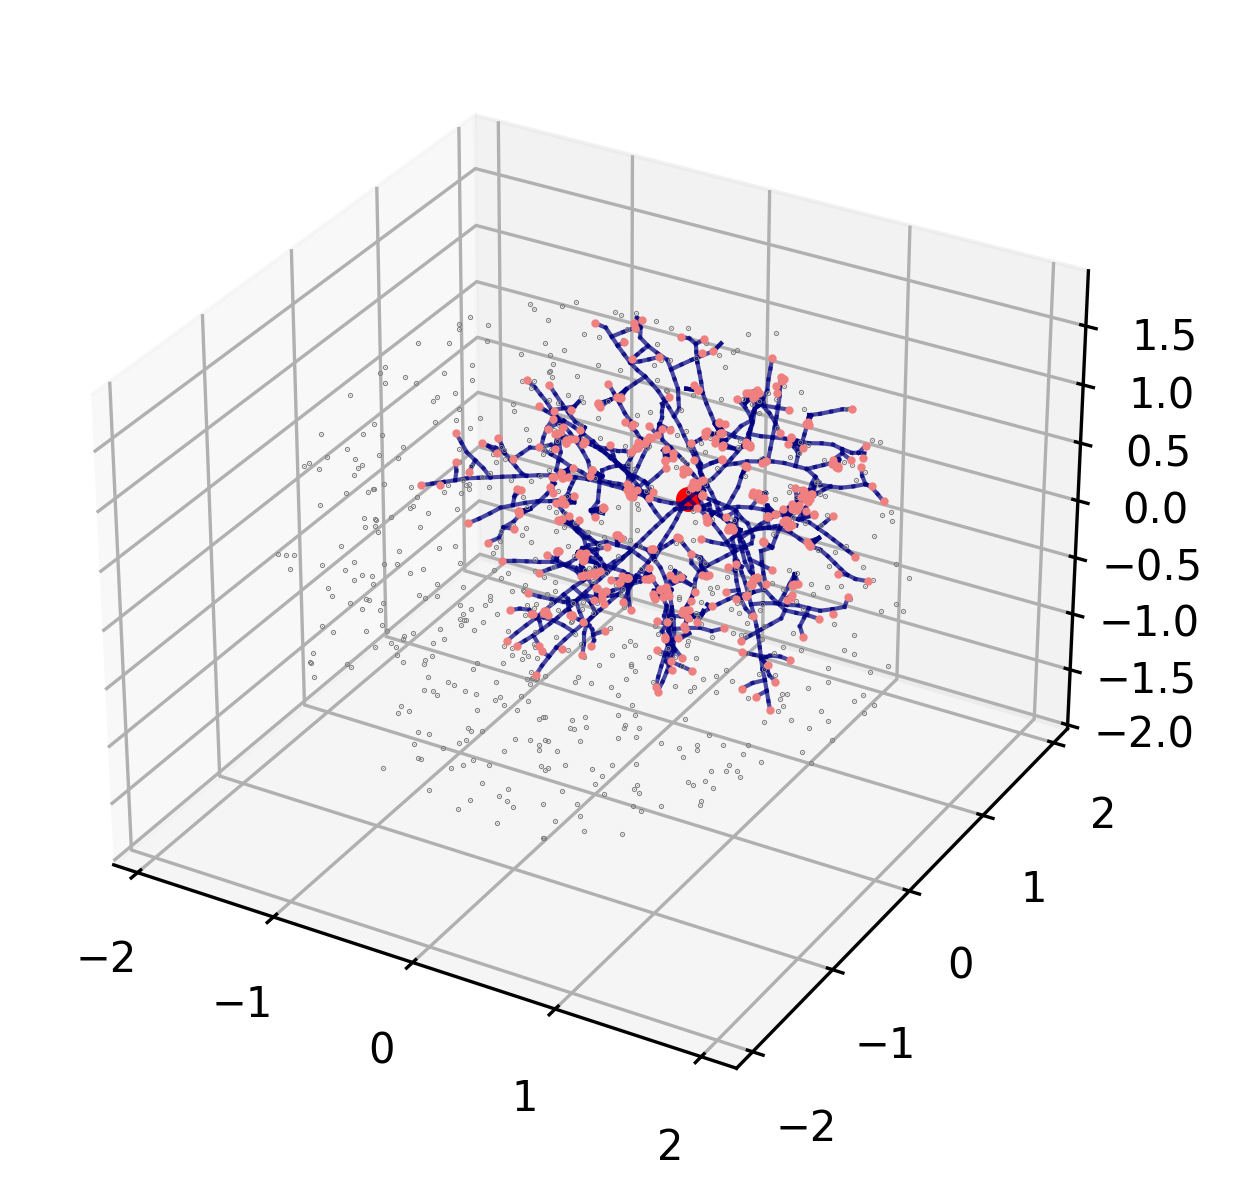

In [410]:
# execute this cell for embedded plotting func
SCA.plot_tree(
    tree=init_SCA.tree,
    root=init_SCA.root,
    sources=init_SCA.sources
)

In [411]:
len(init_SCA.tree)

1251

# Feature extraction

## Save

In [412]:
# let's save morphology first
filename = 'test.swc'
save_path = '' # add your personal save path in ''
save_path

''

In [413]:
# convert tree class object to graph
graph = init_SCA.make_graph()

# you can simulate a tree thickness by
# adding radii with set_thickness function
graph_with_rad = SCA.set_thickness(
    graph=graph,
    Dg=init_SCA.__dict__['Dg']
) 

################################################################
# WARNING! RADII ARE REQUIRED FOR EXECUTING swc_save FUNCTION!
################################################################

# create false radii to continue:
# nx.set_node_attributes(graph, 0.01, name='sigma_mask')

In [414]:
# extract netwprkx graph data
# graph_with_rad.nodes.data()

In [415]:
# now we are ready to save morphology in .swc format
# for additional information see http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html

SCA.swc_save(
    graph=graph_with_rad,
    filename=filename,
    cell_type=7,
    center=root,
    Dg = init_SCA.__dict__['Dg'],
    sigmas_rad=False)

  0%|          | 0/1 [00:00<?, ?it/s]

## Morphological Features

In [416]:
help(utils.SWC_analyse)

Help on class SWC_analyse in module utils:

class SWC_analyse(builtins.object)
 |  SWC_analyse(input_path, save_path)
 |  
 |  #     df = pd.read_csv(path, names=columns, comment='#', sep=sep)
 |  #     apply_casts(df, casts)
 |  #     return df
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_path, save_path)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  morphofeatures(self, features=None, save=True, show_results=False, special_id=None)
 |  
 |  sholl(self, step=1, save=False)
 |  
 |  tmd(self, save=True)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object



In [417]:
filename = '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/test.swc'
analysis = utils.SWC_analyse(input_path=filename, save_path='/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace')

In [418]:
analysis.morphofeatures(save=True)

/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/utils.py:135: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  nodes = swc_data.to_dict('record')
2024-12-11 17:48:17,616 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x31d447550>>
2024-12-11 17:48:17,617 root         INFO     selected features: ['total_volume', 'total_surface_area', 'total_length', 'num_outer_bifurcations', 'max_branch_order', 'num_tips', 'num_branches', 'num_nodes']
2024-12-11 17:48:17,655 root         WARNING  writing additional outputs to csv. See output json for record of selected features and marks


In [419]:
analysis.sholl(step=0.1, save=True)


{'radius': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8]),
 'cross': array([ 6,  8,  9, 14, 19, 20, 30, 53, 53, 56, 58, 47, 44, 29, 14,  9,  3,
         1,  1])}

In [420]:
save_path= '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace'

In [421]:
sholl_file = utils.get_files(save_path, '.txt')
feature_file = utils.get_files(save_path, '.csv')

In [422]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [423]:
def plot_sholl_from_file(file, plot = 'func', color_hist = 'b', color_line='r'):
    rad_for_hist = []
    with open(file) as f:
        lines = f.readlines()
        lines = [l.split(' ') for l in lines[1:]]
        R = []
        rad = [float(l) for l in np.array(lines)[:, 0]]
        crox = [int(l[:-1]) for l in np.array(lines)[:, 1]]
        for m, r in enumerate(rad):
            R.append([r for x in range(crox[m])])
        radcro = flatten(R)
        rad_for_hist.append(radcro)
        name = [os.path.basename(file).split('.')[0] for i in range(len(radcro))]
    if plot == 'func':
        plt.plot(rad, crox, c='r')

    elif plot == 'hist':
        plt.hist(rad_for_hist)
        
    plt.xlabel('Distance from soma')
    plt.ylabel('# Intersections')


In [424]:
sholl_file

['/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/test_sholl.txt',
 '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/requirements.txt',
 '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/S5_1_3_sholl.txt',
 '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/tree3d-wsoma_sholl.txt']

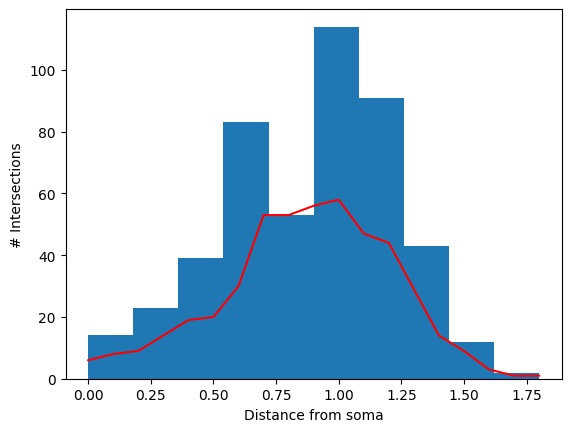

In [425]:
plot_sholl_from_file(sholl_file[0], plot='func')
plot_sholl_from_file(sholl_file[0], plot='hist')

In [426]:
pd.read_csv(feature_file[0])

,reconstruction_id,total_volume,total_surface_area,total_length,num_outer_bifurcations,max_branch_order,num_tips,num_branches,num_nodes
0,S5_1_3,4860.291098,16120.369525,6447.900414,137,40,671,1340,6173


# Advanced Morphological Features

We can also perform the topological analysis with TMD algorithm by BlueBrain project team

See https://github.com/BlueBrain/TMD for more info

In [5]:
# We can also perform the topological analysis with TMD algorithm by BlueBrain project team
# see https://github.com/BlueBrain/TMD for more info

import tmd 
from tmd.view import view, plot
import morphio 
import neurom as nm
from neurom.view import matplotlib_impl, matplotlib_utils

In [9]:
FMM = '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/tmd results/tree3d-wsoma_after_blend.swc'
Clavreul = '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/tmd results/S5_1_3.swc'
Tanya = '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/tmd results/4wk-ly25-raw.swc'
SCA_tree = '/Users/anyak/Documents/Projects/Science/AstroMorpho/AstroSpace/tmd results/SCA_sample.swc'

In [7]:

def create_tmd_object(filepath):
    cell = tmd.io.load_neuron(filepath, line_delimiter='\n', soma_type=None, user_tree_types=None, remove_duplicates=True)
    ph_astro = tmd.methods.get_ph_neuron(cell)
    return ph_astro

In [10]:


cell_FMM = tmd.io.load_neuron(FMM, line_delimiter='\n', soma_type=None, user_tree_types=None, remove_duplicates=True)
ph_astro_FMM = tmd.methods.get_ph_neuron(cell_FMM)

cell_Clavreul = tmd.io.load_neuron(Clavreul, line_delimiter='\n', soma_type=None, user_tree_types=None, remove_duplicates=True)
ph_astro_Clavreul = tmd.methods.get_ph_neuron(cell_Clavreul)

cell_Tanya = tmd.io.load_neuron(Tanya, line_delimiter='\n', soma_type=None, user_tree_types=None, remove_duplicates=True)
ph_astro_Tanya = tmd.methods.get_ph_neuron(cell_Tanya)

In [11]:
# !pip install mycolorpy
from mycolorpy import colorlist as mcp
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
colors = mcp.gen_color(cmap="magma",n=6)
print(colors)
sns.color_palette(colors)

['#000004', '#3b0f70', '#8c2981', '#de4968', '#fe9f6d', '#fcfdbf']


[(0.0, 0.0, 0.01568627450980392),
 (0.23137254901960785, 0.058823529411764705, 0.4392156862745098),
 (0.5490196078431373, 0.1607843137254902, 0.5058823529411764),
 (0.8705882352941177, 0.28627450980392155, 0.40784313725490196),
 (0.996078431372549, 0.6235294117647059, 0.42745098039215684),
 (0.9882352941176471, 0.9921568627450981, 0.7490196078431373)]

In [13]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

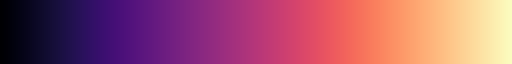

In [14]:
sns.color_palette("magma", as_cmap=True)

In [8]:
def plot_tmd(filepath, 
             save=False, dpi=300, 
             cmap = 'magma'
):
    object = create_tmd_object(filepath=filepath)
    name = os.path.basename(filepath).split('.')[0] + '.png'
    colors = mcp.gen_color(cmap=cmap,n=6)

    def save():
        return plt.savefig(name, dpi=dpi)

    def plot_barcode():
        plot.barcode(object, subplot=True, color=colors[3])

    def plot_diagram():
        plot.diagram(object, subplot=True, color=colors[3], alpha=0.8, edgecolors=colors[2], s=20)

    def plot_image():
        plot.persistence_image(object, subplot=True, cmap=cmap)


    plot_diagram()
    plt.savefig(f'diagram_{name}', dpi=dpi)
    plot_barcode()
    plt.savefig(f'barcode_{name}', dpi=dpi)
    plot_image()
    plt.savefig(f'image_{name}', dpi=dpi)

In [14]:
def get_basename(filepath):
    return os.path.basename(filepath).split('.')[0]

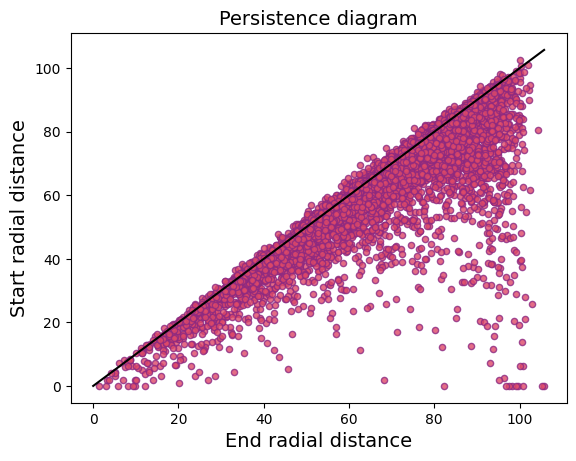

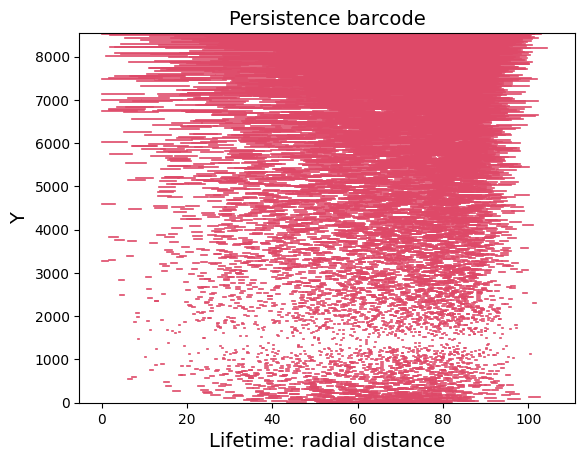

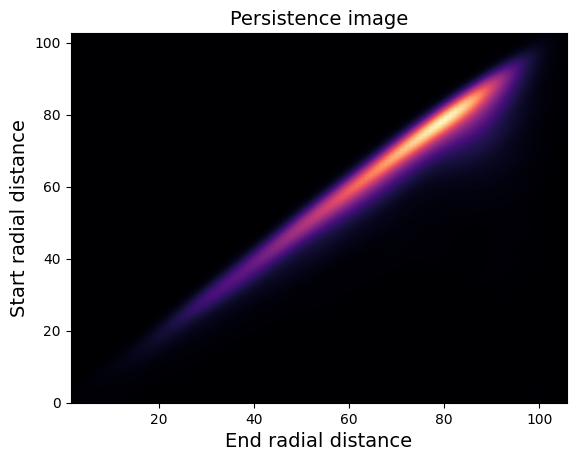

In [17]:
plot.diagram(ph_astro_FMM, subplot=True, color=colors[3], alpha=0.8, edgecolors=colors[2], s=20)
plt.savefig('diagram_FMM.png', dpi=300)

plot.barcode(ph_astro_FMM, subplot=True, color=colors[3])
plt.savefig('barcode_FMM.png', dpi=300)

plot.persistence_image(ph_astro_FMM, subplot=True, cmap='magma')
plt.savefig('persistence_image_FMM.png', dpi=300)

# plot_tmd(Clavreul, save=True)

It is also implemented in utils:

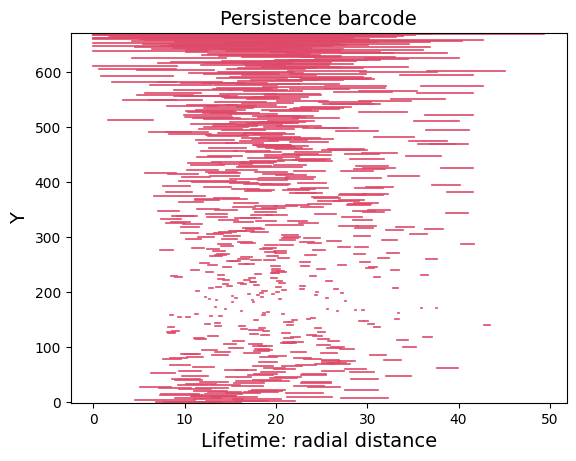

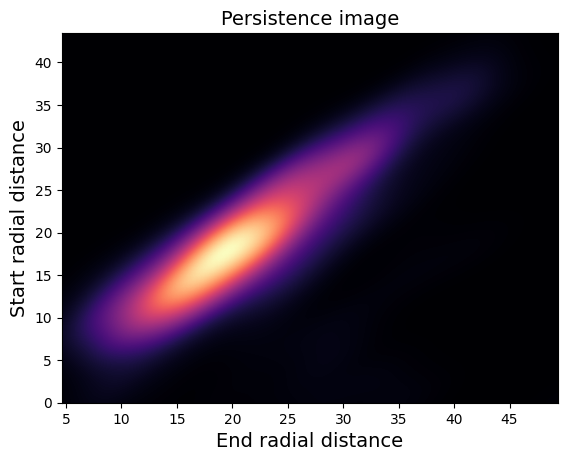

In [18]:
# plot.diagram(ph_astro_Clavreul, subplot=True, color=colors[3], alpha=0.8, edgecolors=colors[2], s=20)
# plt.savefig(f'diagram_{get_basename(Clavreul)}.png', dpi=300)

plot.barcode(ph_astro_Clavreul, subplot=True, color=colors[3])
plt.savefig(f'barcode_{get_basename(Clavreul)}.png', dpi=300)

plot.persistence_image(ph_astro_Clavreul, subplot=True, cmap='magma')
plt.savefig(f'persistence_image_{get_basename(Clavreul)}.png', dpi=300)

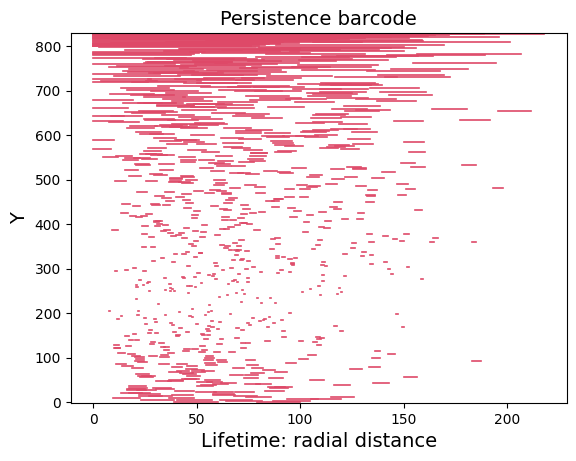

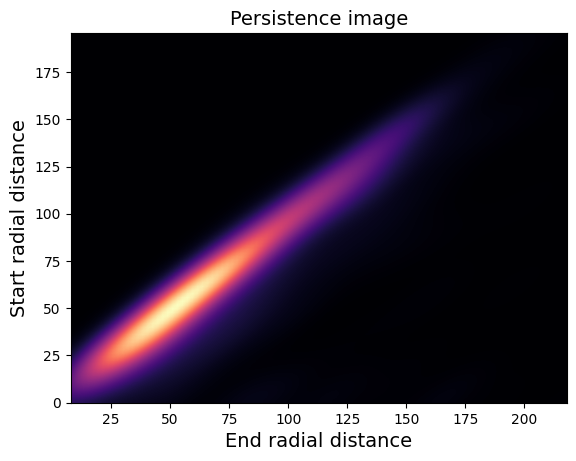

In [19]:
plot.barcode(ph_astro_Tanya, subplot=True, color=colors[3])
plt.savefig(f'barcode_{get_basename(Tanya)}.png', dpi=300)

plot.persistence_image(ph_astro_Tanya, subplot=True, cmap='magma')
plt.savefig(f'persistence_image_{get_basename(Tanya)}.png', dpi=300)

In [15]:
cell_SCA = tmd.io.load_neuron(SCA_tree, line_delimiter='\n', soma_type=None, user_tree_types=None, remove_duplicates=True)
ph_astro_SCA = tmd.methods.get_ph_neuron(cell_SCA)

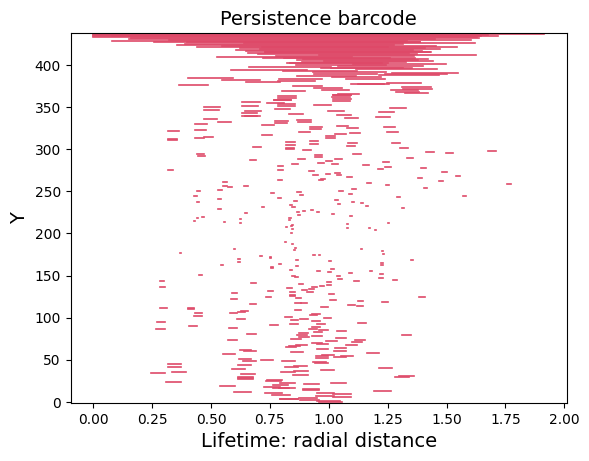

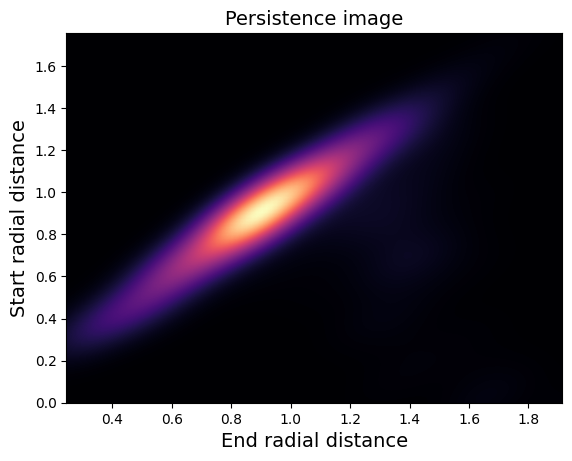

In [435]:
plot.barcode(ph_astro_SCA, subplot=True, color=colors[3])
plt.savefig(f'barcode_{get_basename(SCA_tree)}.png', dpi=300)

plot.persistence_image(ph_astro_SCA, subplot=True, cmap='magma')
plt.savefig(f'persistence_image_{get_basename(SCA_tree)}.png', dpi=300)

In [38]:
def prepare_diagrams(diagrams_data):
    return np.array(diagrams_data)

def kolmogorov_smirnov_persistence_analysis(diagrams1, diagrams2):
    """
    Многомерный тест Колмогорова-Смирнова для persistent диаграмм
    
    Parameters:
    - diagrams1: список persistent диаграмм первой группы
    - diagrams2: список persistent диаграмм второй группы
    
    Returns:
    - Словарь с результатами статистических тестов
    """
    # Стратегии сравнения
    strategies = {
        'birth_times': lambda d: d[:, 0],  # Времена рождения
        'death_times': lambda d: d[:, 1],  # Времена смерти
        'persistence_lengths': lambda d: d[:, 1] - d[:, 0]  # Длины персистентности
    }
    
    results = {}
    
    for name, extractor in strategies.items():
        # Извлечение данных для каждой стратегии
        group1_data = np.concatenate([extractor(d) for d in diagrams1])
        group2_data = np.concatenate([extractor(d) for d in diagrams2])
        
        # Двухвыборочный тест Колмогорова-Смирнова
        statistic, p_value = stats.ks_2samp(group1_data, group2_data)
        
        results[name] = {
            'statistic': statistic,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
    
    # Интегральная оценка различий
    results['overall'] = {
        'significant': any(res['significant'] for res in results.values()),
        'details': results
    }
    
    return results

In [39]:
kolmogorov_smirnov_persistence_analysis(prepare_diagrams(ph_astro_SCA), prepare_diagrams(ph_astro_FMM))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [36]:
prepare_diagrams(ph_astro_FMM).shape

(8543, 2)

In [37]:
prepare_diagrams(ph_astro_Clavreul).shape

(671, 2)